# Planowanie zadań w centrum przeładunkowym z wieloma drzwiami i wyznaczaniem tras pojazdów

## Niezbędne importy

In [1]:
import numpy as np
from problem_definition import ProblemDefinition
from aco import aco
from pso import pso
from sa import sa
from helpers import get_random_params, convert_to_solution
import io, json
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import pandas as pd

## Testy wydajnościowe funkcji celu

### Parametr I od 10 do 1000

Text(0.5, 0, 'Liczba zamówień')

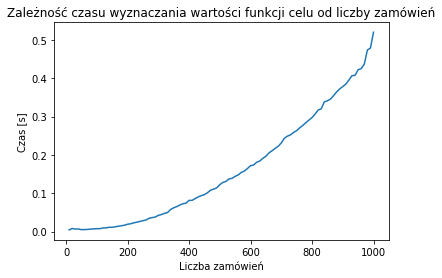

In [2]:
# Is = list(range(10, 1001, 10))
# N = 10
# M = 10
# K = 8
# L = 8

# ps = [None] * len(Is)
# for i, I in tqdm(enumerate(Is)):
#     ps[i] = get_random_params(I, N, M, K, L)

# x = np.random.rand(4*1000+10+10)

# times = [0]*len(ps)
# for i, p in tqdm(enumerate(ps)):
#     inst = ProblemDefinition(p)
#     start = time.time()
#     inst.cost_function(*convert_to_solution(x, inst))
#     times[i] = time.time() - start

# plot_data = {"I": Is, "times": times}
# with io.open('./testdata/cost_function/I_impact.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(plot_data, ensure_ascii=False))

with io.open('./testdata/cost_function/I_impact.json', 'r', encoding='utf-8') as f:
    plot_data = json.load(f)

plt.plot(plot_data["I"], plot_data["times"])
plt.title("Zależność czasu wyznaczania wartości funkcji celu od liczby zamówień")
plt.ylabel("Czas [s]")
plt.xlabel("Liczba zamówień")

### Parametry N oraz M od 10 do 500

Text(0.5, 0, 'Liczba ciężarówek odbiorczych oraz dostawczych')

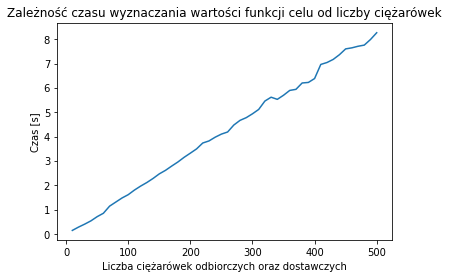

In [3]:
# I = 500
# N_and_M = list(range(10, 501, 10))
# K = 8
# L = 8

# ps = [None] * len(N_and_M)
# for i, NM in tqdm(enumerate(N_and_M)):
#     ps[i] = get_random_params(I, NM, NM, K, L)

# x = np.random.rand(4*500+500+500)
# times = [0]*len(ps)
# for i, p in tqdm(enumerate(ps)):
#     inst = ProblemDefinition(p)
#     start = time.time()
#     inst.cost_function(*convert_to_solution(x, inst))
#     times[i] = time.time() - start

# plot_data = {"N_and_M": N_and_M, "times": times}
# with io.open('./testdata/cost_function/N_and_M_impact.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(plot_data, ensure_ascii=False))

with io.open('./testdata/cost_function/N_and_M_impact.json', 'r', encoding='utf-8') as f:
    plot_data = json.load(f)

plt.plot(plot_data["N_and_M"], plot_data["times"])
plt.title("Zależność czasu wyznaczania wartości funkcji celu od liczby ciężarówek")
plt.ylabel("Czas [s]")
plt.xlabel("Liczba ciężarówek odbiorczych oraz dostawczych")

### Parametry K oraz L od 10 do 200

Text(0.5, 0, 'Liczba doków rozładunkowych oraz załadunkowych')

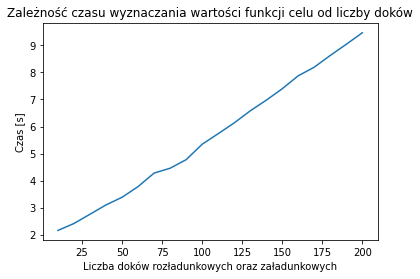

In [4]:
# I = 400
# N = 200
# M = 200
# K_and_L = list(range(10, 201, 10))

# ps = [None] * len(K_and_L)
# for i, KL in tqdm(enumerate(K_and_L)):
#     ps[i] = get_random_params(I, N, M, KL, KL)

# x = np.random.rand(4*400+200+200)
# times = [0]*len(ps)
# for i, p in tqdm(enumerate(ps)):
#     inst = ProblemDefinition(p)
#     start = time.time()
#     inst.cost_function(*convert_to_solution(x, inst))
#     times[i] = time.time() - start

# plot_data = {"K_and_L": K_and_L, "times": times}
# with io.open('./testdata/cost_function/K_and_L_impact.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(plot_data, ensure_ascii=False))

with io.open('./testdata/cost_function/K_and_L_impact.json', 'r', encoding='utf-8') as f:
    plot_data = json.load(f)

plt.plot(plot_data["K_and_L"], plot_data["times"])
plt.title("Zależność czasu wyznaczania wartości funkcji celu od liczby doków")
plt.ylabel("Czas [s]")
plt.xlabel("Liczba doków rozładunkowych oraz załadunkowych")

## Testy algorytmów optymalizacyjnych

### Generacja losowych problemów testowych

In [5]:
# Is = list(range(5, 55, 5))
# Ns = list(range(3, 33, 3))
# Ms = list(range(3, 33, 3))
# Ks = list(range(2, 22, 2))
# Ls = list(range(2, 22, 2))
# Is, Ns, Ms, Ks, Ls

# test_problems = []
# for I, N, M, K, L in zip(Is, Ns, Ms, Ks, Ls):
#     test_problems.append(get_random_params(I, N, M, K, L))

# with io.open('./testdata/algorithms/test_problems.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(test_problems, ensure_ascii=False))

with io.open('./testdata/algorithms/test_problems.json', 'r', encoding='utf-8') as f:
    test_problems = json.load(f)

### Testy algorytmu SA

In [6]:
NUM_RUNS_OF_EACH_ALG = 10

SA_MAXITER = 200
SA_STEP = 0.001

sa_results = []
for p_id, p in enumerate(test_problems):
    print("\nProblem " + str(p_id), end="")
    sa_results.append([])
    inst = ProblemDefinition(p)
    lb = [0]*(4*inst.I+inst.N+inst.M)
    ub = [0.999999]*(4*inst.I+inst.N+inst.M)
    def cost(x):
        return inst.cost_function(*convert_to_solution(x, inst))
    for i in range(NUM_RUNS_OF_EACH_ALG):
        sa_results[p_id].append(sa(cost, lb, ub, maxiter=SA_MAXITER, debug_output=True, step_coeff=SA_STEP))
        print(".", end="")


Problem 0..........
Problem 1..........
Problem 2..........
Problem 3..........
Problem 4..........
Problem 5..........
Problem 6..........
Problem 7..........
Problem 8..........
Problem 9..........

In [7]:
sa_stats = pd.DataFrame(data={
    "Problem No": list(range(1, 11)),
    "Avg cost": [np.mean([sa_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min cost": [np.min([sa_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max cost": [np.max([sa_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Avg time [s]": [np.mean([sa_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min time [s]": [np.min([sa_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max time [s]": [np.max([sa_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    })
sa_stats = sa_stats.set_index("Problem No")
sa_stats

,Avg cost,Min cost,Max cost,Avg time [s],Min time [s],Max time [s]
Problem No,,,,,,
1,83.2,55.0,144.0,0.041872,0.038255,0.050420
2,90.8,51.0,148.0,0.068382,0.066138,0.071064
3,163.9,116.0,244.0,0.103265,0.097989,0.108278
4,113.9,88.0,147.0,0.152850,0.131428,0.176724
5,116.6,57.0,155.0,0.215351,0.185773,0.275641
6,164.9,105.0,201.0,0.353667,0.253473,0.468649
7,180.4,100.0,236.0,0.683328,0.410766,1.076916
8,274.5,194.0,359.0,1.096141,0.634945,1.645180
9,150.9,97.0,241.0,1.623572,1.099584,2.337887


Text(0, 0.5, 'Wartość funkcji celu')

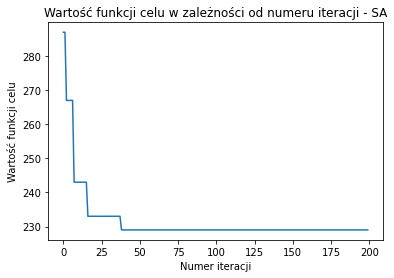

In [8]:
costs = sa_results[-1][-1][3]
plt.plot(list(range(len(costs))), costs)
plt.title("Wartość funkcji celu w zależności od numeru iteracji - SA")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość funkcji celu")

### Testy algorytmu PSO

In [9]:
PSO_MAXITER = 200
PSO_SWARM_SIZE = 16
PSO_W = 0.5
PSO_C1 = 0.5
PSO_C2 = 0.5
PSO_PROCESSES = 16

pso_results = []
for p_id, p in enumerate(test_problems):
    print("\nProblem " + str(p_id), end="")
    pso_results.append([])
    inst = ProblemDefinition(p)
    lb = [0]*(4*inst.I+inst.N+inst.M)
    ub = [0.999999]*(4*inst.I+inst.N+inst.M)
    def cost(x):
        return inst.cost_function(*convert_to_solution(x, inst))
    for i in range(NUM_RUNS_OF_EACH_ALG):
        pso_results[p_id].append(pso(cost, lb, ub, maxiter=PSO_MAXITER, swarm_size=PSO_SWARM_SIZE, w=PSO_W, c1=PSO_C1, c2=PSO_C2, processes=PSO_PROCESSES, debug_output=True))
        print(".", end="")


Problem 0..........
Problem 1..........
Problem 2..........
Problem 3..........
Problem 4..........
Problem 5..........
Problem 6..........
Problem 7..........
Problem 8..........
Problem 9..........

In [10]:
pso_stats = pd.DataFrame(data={
    "Problem No": list(range(1, 11)),
    "Avg cost": [np.mean([pso_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min cost": [np.min([pso_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max cost": [np.max([pso_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Avg time [s]": [np.mean([pso_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min time [s]": [np.min([pso_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max time [s]": [np.max([pso_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    })
pso_stats = pso_stats.set_index("Problem No")
pso_stats

,Avg cost,Min cost,Max cost,Avg time [s],Min time [s],Max time [s]
Problem No,,,,,,
1,33.1,31.0,40.0,1.900517,1.805224,1.982002
2,33.8,27.0,48.0,2.086021,2.004585,2.202051
3,71.0,60.0,78.0,2.726221,2.390631,3.048012
4,56.8,49.0,62.0,3.862747,3.351876,4.348050
5,57.1,47.0,65.0,4.929159,4.356019,5.793579
6,86.7,77.0,100.0,7.167171,6.282073,7.722744
7,96.3,83.0,110.0,9.585377,8.789085,11.025401
8,126.2,113.0,159.0,13.855014,10.697097,15.111690
9,91.6,77.0,111.0,17.975251,16.159269,19.833495


Text(0, 0.5, 'Wartość funkcji celu')

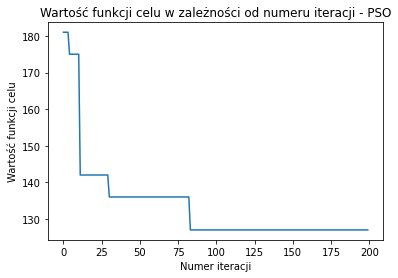

In [11]:
costs = pso_results[-1][-1][3]
plt.plot(list(range(len(costs))), costs)
plt.title("Wartość funkcji celu w zależności od numeru iteracji - PSO")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość funkcji celu")

### Testy algorytmu SA w połączeniu z ACO

In [12]:
SA_ACO_MAXITER_SA = 20
SA_ACO_STEP= 0.001

SA_ACO_MAXITER_ACO = 10
SA_ACO_NUM_ANTS = 10
SA_ACO_ALPHA = 1
SA_ACO_BETA = 1
SA_ACO_RO = 0.5

sa_aco_results = []
for p_id, p in enumerate(test_problems):
    print("\nProblem " + str(p_id), end="")
    sa_aco_results.append([])
    inst = ProblemDefinition(p)
    lb = [0]*(2*inst.I+inst.N+inst.M)
    ub = [0.999999]*(2*inst.I+inst.N+inst.M)
    def cost(x):
        return inst.cost_function(*convert_to_solution(x, inst, use_ACO=True, num_ants=SA_ACO_NUM_ANTS, alpha=SA_ACO_ALPHA, beta=SA_ACO_BETA, ro=SA_ACO_RO, maxiter=SA_ACO_MAXITER_ACO))
    for i in range(NUM_RUNS_OF_EACH_ALG):
        sa_aco_results[p_id].append(sa(cost, lb, ub, maxiter=SA_ACO_MAXITER_SA, debug_output=True, step_coeff=SA_ACO_STEP))
        print(".", end="")


Problem 0..........
Problem 1..........
Problem 2..........
Problem 3..........
Problem 4..........
Problem 5..........
Problem 6..........
Problem 7..........
Problem 8..........
Problem 9..........

In [13]:
sa_aco_stats = pd.DataFrame(data={
    "Problem No": list(range(1, 11)),
    "Avg cost": [np.mean([sa_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min cost": [np.min([sa_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max cost": [np.max([sa_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Avg time [s]": [np.mean([sa_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min time [s]": [np.min([sa_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max time [s]": [np.max([sa_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    })
sa_aco_stats = sa_aco_stats.set_index("Problem No")
sa_aco_stats

,Avg cost,Min cost,Max cost,Avg time [s],Min time [s],Max time [s]
Problem No,,,,,,
1,68.2,35.0,114.0,0.011859,0.009899,0.017730
2,69.2,40.0,120.0,0.017632,0.016136,0.023805
3,153.8,91.0,229.0,0.072943,0.023183,0.153326
4,108.2,66.0,155.0,0.063822,0.028137,0.241818
5,134.2,64.0,283.0,0.114994,0.032902,0.326743
6,164.0,129.0,201.0,0.144199,0.039282,0.324478
7,223.7,153.0,429.0,0.242740,0.105372,0.376241
8,250.8,172.0,360.0,0.264502,0.099228,0.746332
9,160.8,126.0,210.0,0.502720,0.333661,0.682982


Text(0, 0.5, 'Wartość funkcji celu')

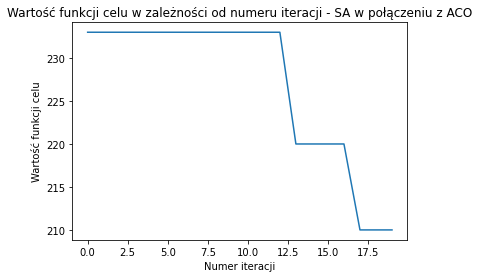

In [14]:
costs = sa_aco_results[-1][-1][3]
plt.plot(list(range(len(costs))), costs)
plt.title("Wartość funkcji celu w zależności od numeru iteracji - SA w połączeniu z ACO")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość funkcji celu")

### Testy algorytmu PSO w połączeniu z ACO

In [15]:
PSO_ACO_MAXITER_PSO = 20
PSO_ACO_SWARM_SIZE = 16
PSO_ACO_W = 0.5
PSO_ACO_C1 = 0.5
PSO_ACO_C2 = 0.5
PSO_ACO_PROCESSES = 16

PSO_ACO_MAXITER_ACO = 10
PSO_ACO_NUM_ANTS = 10
PSO_ACO_ALPHA = 1
PSO_ACO_BETA = 1
PSO_ACO_RO = 0.5

pso_aco_results = []
for p_id, p in enumerate(test_problems):
    print("\nProblem " + str(p_id), end="")
    pso_aco_results.append([])
    inst = ProblemDefinition(p)
    lb = [0]*(2*inst.I+inst.N+inst.M)
    ub = [0.999999]*(2*inst.I+inst.N+inst.M)
    def cost(x):
        return inst.cost_function(*convert_to_solution(x, inst, use_ACO=True, num_ants=PSO_ACO_NUM_ANTS, alpha=PSO_ACO_ALPHA, beta=PSO_ACO_BETA, ro=PSO_ACO_RO, maxiter=PSO_ACO_MAXITER_ACO))
    for i in range(NUM_RUNS_OF_EACH_ALG):
        pso_aco_results[p_id].append(pso(cost, lb, ub, maxiter=PSO_ACO_MAXITER_PSO, swarm_size=PSO_ACO_SWARM_SIZE, w=PSO_ACO_W, c1=PSO_ACO_C1, c2=PSO_ACO_C2, processes=PSO_ACO_PROCESSES, debug_output=True))
        print(".", end="")


Problem 0..........
Problem 1..........
Problem 2..........
Problem 3..........
Problem 4..........
Problem 5..........
Problem 6..........
Problem 7..........
Problem 8..........
Problem 9..........

In [16]:
pso_aco_stats = pd.DataFrame(data={
    "Problem No": list(range(1, 11)),
    "Avg cost": [np.mean([pso_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min cost": [np.min([pso_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max cost": [np.max([pso_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Avg time [s]": [np.mean([pso_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Min time [s]": [np.min([pso_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "Max time [s]": [np.max([pso_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    })
pso_aco_stats = pso_aco_stats.set_index("Problem No")
pso_aco_stats

,Avg cost,Min cost,Max cost,Avg time [s],Min time [s],Max time [s]
Problem No,,,,,,
1,31.5,30.0,34.0,2.686849,1.958339,3.939995
2,30.9,26.0,36.0,12.931131,10.966779,14.962709
3,67.5,59.0,79.0,21.739879,19.259688,25.459707
4,50.6,41.0,59.0,31.490228,28.493852,34.404466
5,57.1,52.0,61.0,41.668322,39.552725,44.536613
6,84.3,82.0,89.0,53.199094,51.458671,56.270335
7,98.4,79.0,108.0,61.763226,57.496886,65.987298
8,129.5,117.0,141.0,75.468124,69.464520,79.743092
9,92.2,83.0,106.0,84.124135,80.518609,89.264231


Text(0, 0.5, 'Wartość funkcji celu')

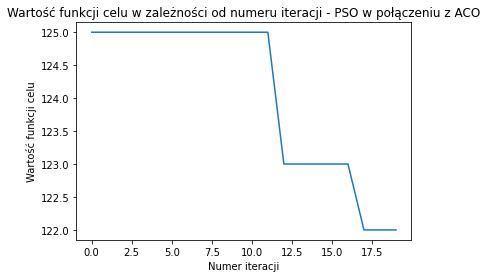

In [17]:
costs = pso_aco_results[-1][-1][3]
plt.plot(list(range(len(costs))), costs)
plt.title("Wartość funkcji celu w zależności od numeru iteracji - PSO w połączeniu z ACO")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość funkcji celu")

### Zestawienie wyników

In [18]:
summary_cost_stats = pd.DataFrame(data={
    "Problem No": list(range(1, 11)),
    "SA avg cost": [np.mean([sa_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "PSO avg cost": [np.mean([pso_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "SA+ACO avg cost": [np.mean([sa_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "PSO+ACO avg cost": [np.mean([pso_aco_results[i][x][1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    })
summary_cost_stats = summary_cost_stats.set_index("Problem No")
summary_cost_stats

,SA avg cost,PSO avg cost,SA+ACO avg cost,PSO+ACO avg cost
Problem No,,,,
1,83.2,33.1,68.2,31.5
2,90.8,33.8,69.2,30.9
3,163.9,71.0,153.8,67.5
4,113.9,56.8,108.2,50.6
5,116.6,57.1,134.2,57.1
6,164.9,86.7,164.0,84.3
7,180.4,96.3,223.7,98.4
8,274.5,126.2,250.8,129.5
9,150.9,91.6,160.8,92.2


In [19]:
summary_time_stats = pd.DataFrame(data={
    "Problem No": list(range(1, 11)),
    "SA avg time": [np.mean([sa_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "PSO avg time": [np.mean([pso_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "SA+ACO avg time": [np.mean([sa_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    "PSO+ACO avg time": [np.mean([pso_aco_results[i][x][2][-1] for x in range(NUM_RUNS_OF_EACH_ALG)]) for i in range(NUM_RUNS_OF_EACH_ALG)],
    })
summary_time_stats = summary_time_stats.set_index("Problem No")
summary_time_stats

,SA avg time,PSO avg time,SA+ACO avg time,PSO+ACO avg time
Problem No,,,,
1,0.041872,1.900517,0.011859,2.686849
2,0.068382,2.086021,0.017632,12.931131
3,0.103265,2.726221,0.072943,21.739879
4,0.152850,3.862747,0.063822,31.490228
5,0.215351,4.929159,0.114994,41.668322
6,0.353667,7.167171,0.144199,53.199094
7,0.683328,9.585377,0.242740,61.763226
8,1.096141,13.855014,0.264502,75.468124
9,1.623572,17.975251,0.502720,84.124135
